In [1]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: Multi-Layer Perceptron from scratch
# Author: Tracy Tao
# Date: 2022/04/10
import torch

OSError: [WinError 1455] 页面文件太小，无法完成操作。 Error loading "D:\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.

In [2]:
%matplotlib inline
from d2l import torch as d2l

- tensor.detach()
    - 返回一个新的tensor，从当前计算图中**分离**下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，**不具有grad。**
    - 即使之后重新将它的requires_grad置为true,它也不会具有梯度grad
    - 这样我们就会继续使用这个新的tensor进行计算，后面当我们进行反向传播时，到该调用detach()的tensor就会停止，不能再继续向前进行传播
   - 注意：使用detach返回的tensor和原始的tensor共同一个内存，即一个修改另一个也会跟着改变。

In [18]:

from torch import nn


batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [19]:
num_inputs, num_outputs, num_hiddens = 784,10,256

In [20]:
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad = True) *0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad = True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
params = [W1, b1, W2, b2]

In [22]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

- torch.max(input, dim) 函数
    - dim是max函数索引的维度0/1，0是每列的最大值，1是每行的最大值
- torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)

In [29]:
a = torch.randn(3,3)

torch.max(a)

tensor(1.1576)

In [30]:
a.max()

tensor(1.1576)

In [14]:
# 忽略了空间结构， 所以我们使用reshape将每个二维图像转换为一个长度为num_inputs的向量。
def net(X):
    X = X.reshape((-1,num_inputs))
    H = relu(X@W1 + b1)
    return (H@W2 + b2)

In [15]:
# loss function
loss= nn.CrossEntropyLoss(reduction='none')

In [16]:
loss

CrossEntropyLoss()

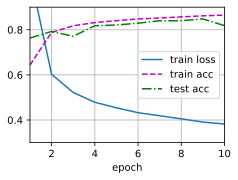

In [23]:
num_epochs, lr =10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter,test_iter,loss,num_epochs,updater)

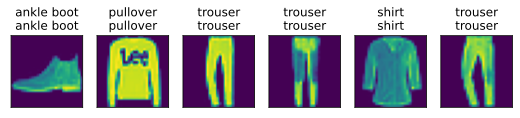

In [24]:
d2l.predict_ch3(net,test_iter)

In [25]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784,256),
                    nn.ReLU(),
                    nn.Linear(256,10))

In [26]:
def init_weights(m):
    if type(m) ==nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [27]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [29]:
batch_size, lr, num_epochs = 256,0.1,10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [32]:
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

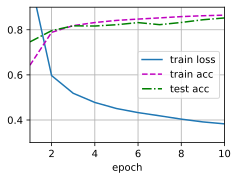

In [33]:
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

In [34]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [35]:
max_degree = 20 # 最大阶数
n_train, n_test = 100, 100
# train / test size
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2,-3.4,5.6])

In [36]:
features = np.random.normal(size = (n_train + n_test,1))
np.random.shuffle(features)

In [37]:
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))

- reshape（-1，1）之后，数据集似乎变成了一列
- reshape(1,-1) 直接变成了一行了
- -1在这里应该可以理解为一个正整数通配符，它代替任何整数。其行或列会随机分配一个数据。

In [38]:
for i in range(max_degree):
    poly_features[:,i] /= math.gamma(i+1) # gamma(n) = (n-1)!

In [39]:
# labels dim ( n_train+n_test,)
labels = np.dot(poly_features, true_w)

In [40]:
labels += np.random.normal(scale=0.1, size=labels.shape)

In [66]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]          

(tensor([[0.2295],
         [1.1425]]),
 tensor([[1.0000e+00, 2.2951e-01, 2.6337e-02, 2.0148e-03, 1.1560e-04, 5.3064e-06,
          2.0298e-07, 6.6549e-09, 1.9092e-10, 4.8686e-12, 1.1174e-13, 2.3313e-15,
          4.4588e-17, 7.8717e-19, 1.2904e-20, 1.9744e-22, 2.8322e-24, 3.8235e-26,
          4.8752e-28, 5.8889e-30],
         [1.0000e+00, 1.1425e+00, 6.5271e-01, 2.4858e-01, 7.1004e-02, 1.6225e-02,
          3.0897e-03, 5.0430e-04, 7.2023e-05, 9.1433e-06, 1.0447e-06, 1.0851e-07,
          1.0331e-08, 9.0799e-10, 7.4101e-11, 5.6443e-12, 4.0305e-13, 2.7089e-14,
          1.7194e-15, 1.0340e-16]]),
 tensor([5.1581, 5.5800]))

In [67]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

- numel() = number of elem

In [68]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.9990134  1.2215012 -3.3948674  5.586707 ]]


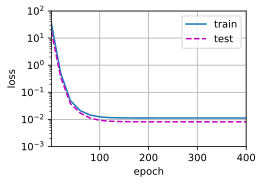

In [69]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.0009267 5.1667576]]


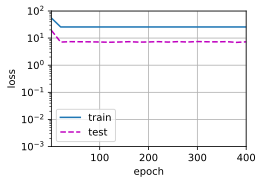

In [70]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight: [[ 5.00576162e+00  1.26230836e+00 -3.42394900e+00  5.35420084e+00
   8.13647360e-03  7.12655485e-01  5.96353710e-01  1.08202454e-03
   7.67221004e-02 -1.58019006e-01 -1.32385910e-01  1.90267757e-01
  -1.85053691e-01 -1.94253176e-01 -2.03992799e-01 -1.94033563e-01
  -7.13917464e-02 -1.18113466e-01 -6.15383871e-02  2.05328166e-01]]


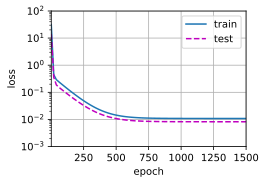

In [71]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)